In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = []
results_dir = "/nethome/dhe83/flash/openpi/data/libero/results"
for directory_path in os.listdir(results_dir):
    if "checkpoint_10000" not in directory_path:
        continue

    replan_steps = int(directory_path.split("_")[-1])
    files = os.listdir(os.path.join(results_dir, directory_path))
    for file in files:
        parsed = file.split(".")[0].split("_")

        task = "_".join(parsed[1:-2])
        index, success = int(parsed[-2]), parsed[-1] == "success"
        data.append({"replan_steps": replan_steps, "task": task, "index": index, "success": success})

df = pd.DataFrame(data)

In [3]:
success_rate = df.groupby(["replan_steps", "task"])["success"].mean().reset_index()

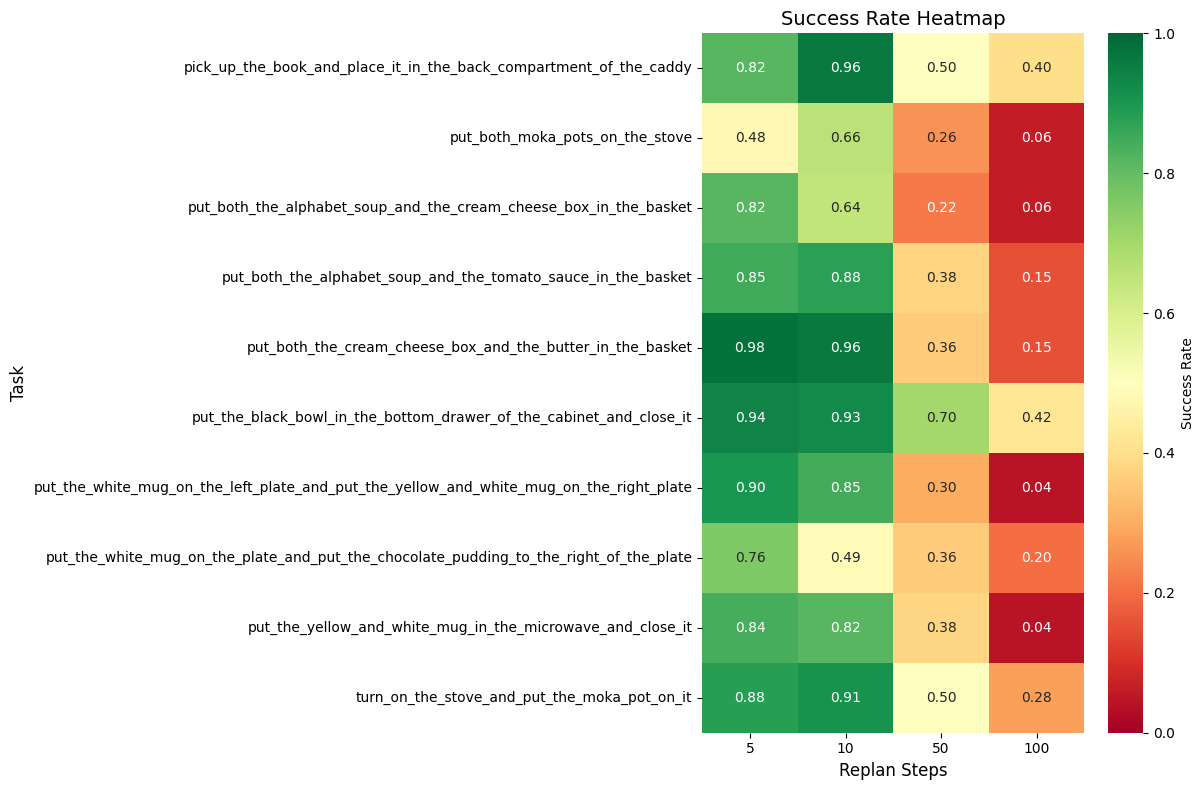

In [5]:
# Heatmap visualization
plt.figure(figsize=(12, 8))

pivot_data = success_rate.pivot(index='task', columns='replan_steps', values='success')

sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='RdYlGn', 
            vmin=0, vmax=1, cbar_kws={'label': 'Success Rate'})

plt.xlabel('Replan Steps', fontsize=12)
plt.ylabel('Task', fontsize=12)
plt.title('Success Rate Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

In [3]:
data = []
results_dir = "/nethome/dhe83/flash/openpi/data/libero/results"
for directory_path in os.listdir(results_dir):
    if "flow_match" not in directory_path:
        continue

    flow_matching_steps = int(directory_path.split("_")[-1])
    files = os.listdir(os.path.join(results_dir, directory_path))
    for file in files:
        parsed = file.split(".")[0].split("_")

        task = "_".join(parsed[1:-2])
        index, success = int(parsed[-2]), parsed[-1] == "success"
        data.append({"flow_matching_steps": flow_matching_steps, "task": task, "index": index, "success": success})

df = pd.DataFrame(data)

In [4]:
success_rate = df.groupby(["flow_matching_steps", "task"])["success"].mean().reset_index()

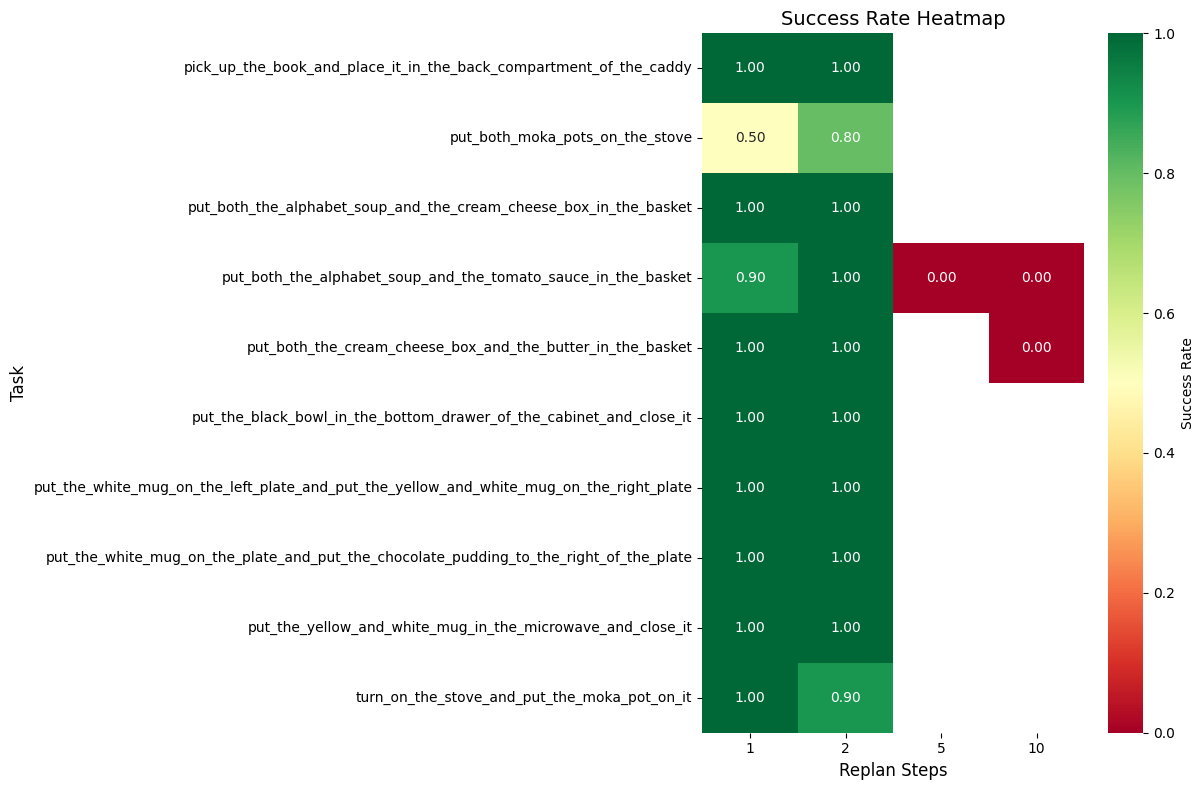

In [5]:
# Heatmap visualization
plt.figure(figsize=(12, 8))

pivot_data = success_rate.pivot(index='task', columns='flow_matching_steps', values='success')

sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='RdYlGn', 
            vmin=0, vmax=1, cbar_kws={'label': 'Success Rate'})

plt.xlabel('Replan Steps', fontsize=12)
plt.ylabel('Task', fontsize=12)
plt.title('Success Rate Heatmap', fontsize=14)
plt.tight_layout()
plt.show()